In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Possion Distribution

### CLT - Possion

In [2]:
M = 5000
n_choices= [5, 10, 100, 1000]

def rv_pos(n):
    Sn = sum(np.array([np.random.poisson(lam=1/2) for i in range(n)]))
    rv = (Sn - n*(1/2))/((n**(1/2))*0.5)
    
    return rv


hist_1 = np.zeros((4, M))

for i in range(len(n_choices)):
    hist_1[i] = np.array([rv_pos(n_choices[i]) for j in range(M)])


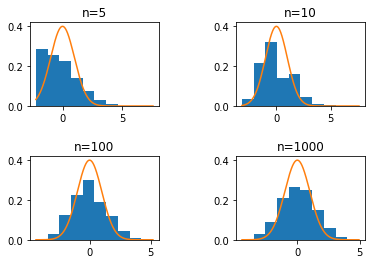

In [3]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

for i in range(len(n_choices)):
    x_space = np.linspace(min(hist_1[i]), max(hist_1[i]), 1000)
    axs[i//2, i%2].hist(hist_1[i], density=True)
    axs[i//2, i%2].plot(x_space, stats.norm(0, 1).pdf(x_space))
    axs[i//2, i%2].set_title("n=" + str(n_choices[i]))

As we can see, when $n$ becomes larger, the distribution of the generated random variable $\frac{S_n - n \cdot \mu}{\sqrt{n}\cdot \sigma}$ is more close to normal distribution, which is the essense of central limit theorem.

### LNN - Possion

In [4]:
def rv_pos_lln(n):
    Xn_bar = np.array([np.random.poisson(lam=1/2) for i in range(n)]).mean()
    return Xn_bar
    
hist_2 = np.zeros((4, M))

for i in range(len(n_choices)):
    hist_2[i] = np.array([rv_pos_lln(n_choices[i]) for j in range(M)])




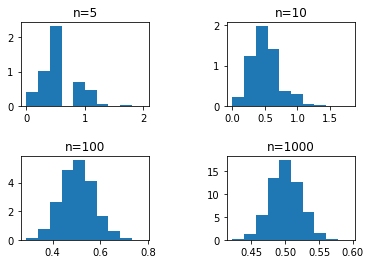

In [5]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

for i in range(len(n_choices)):
    x_space = np.linspace(min(hist_2[i]), max(hist_2[i]), 1000)
    axs[i//2, i%2].hist(hist_2[i], density=True)
    axs[i//2, i%2].set_title("n=" + str(n_choices[i]))

As we can see, as $n$ grows, $\bar{X_n}$ is more concentrated to the mean of $X_1$, which is 1.
~
The reuslt is consistent with __Law of Large Numbers__

## Cauchy

In [6]:
def rv_cauchy(n):
    Sn = sum(np.array([np.random.standard_cauchy() for i in range(n)]))
    # rv = (Sn - n*(1/2))/((n**(1/2))*0.5)
    # Since mean and variance is essentially missing here
    # We do not normalize it
    return Sn/n

hist_3 = np.zeros((4, M))

for i in range(len(n_choices)):
    hist_3[i] = np.array([rv_cauchy(n_choices[i]) for j in range(M)])
    

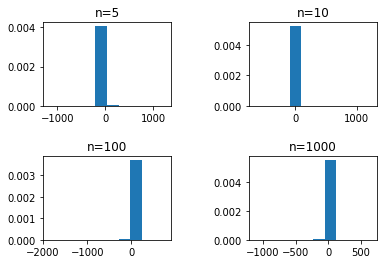

In [7]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

for i in range(len(n_choices)):
    x_space = np.linspace(min(hist_3[i]), max(hist_3[i]), 1000)
    axs[i//2, i%2].hist(hist_3[i], density=True)
    # axs[i//2, i%2].plot(x_space, stats.norm(0, 1).pdf(x_space))
    axs[i//2, i%2].set_title("n=" + str(n_choices[i]))

As we can see, the mean of cauchy distributions do not behave like other distributions, which conerges to the mean as $n$ grows large. This is perhaps because the mean and variance of cauchy distribution is essentially missing.